<a href="https://colab.research.google.com/github/PhateTarun/machine-learning/blob/master/Monster_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# The Validator Collection is a Python library that provides more than 60 functions that can be used to 
# validate the type and contents of an input value.  https://pypi.org/project/validator-collection/
!pip install validator_collection

In [0]:
import pandas as pd
import numpy as np
import json
from collections import Counter
import requests
import urllib
from random import randint
from tqdm import tqdm

from validator_collection import validators, checkers

import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
import re

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS


from prettytable import PrettyTable

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
data = []
with open('/content/drive/My Drive/Monster_usa_job_listings_dataset_20190601_20190930__20k_data.ldjson') as f:
    for line in f:
        data.append(json.loads(line))  # loads is formed out of string while load method can give any data allowed by the conversion table.

Monster.com is the job posting website. Our task is to analyize the general trends which are followed by the companies while posting jobs on monster.com

In [0]:
data = pd.DataFrame(data)
data.head()

,uniq_id,crawl_timestamp,url,job_title,category,company_name,city,state,country,post_date,job_description,job_board,geo,job_post_lang,html_job_description,site_name,domain,postdate_yyyymmdd,has_expired,last_expiry_check_date,postdate_in_indexname_format,inferred_city,inferred_state,inferred_country,fitness_score,job_type,company_description,contact_person,contact_phone_number,inferred_iso2_lang_code,inferred_iso3_lang_code,job_requirements,salary_offered,contact_email
0,ac0f79f80c9bca712c4d8c4e88139368,2019-09-25 12:19:39 +0000,https://job-openings.monster.com/dialysis-tech...,Dialysis Technician,healthcare technology jobs,Boson Health,Stafford,TX,Usa,2019-09-25,The Dialysis Technician functions under the di...,monster,usa,en,<p>The Dialysis Technician functions under the...,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,20190925,false,2019.09.25,2019.09.21,Stafford,Texas,United states,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10ffec2ba375ce1f7836d982e53cefc9,2019-06-22 06:43:09 +0000,https://offre-demploi.monster.fr/stage-alterna...,Stage/alternance - Juriste (H/F),emploi juridique.aspx,AstraZeneca,NaN,NaN,France,2019-06-20,Stage ou Alternance - Juriste \nA pourvoir dè...,monster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,France,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4d02c5993df71363a0d3691f63339874,2019-07-24 02:05:27 +0000,https://job-openings.monster.com/specialty-pha...,Specialty Pharmaceutical Sales Rep/Clinical Sp...,sales jobs,Indivior,Scranton,PA,Usa,2019-07-23,TITLE: Specialty Pharmaceutical Sales Rep/Cli...,monster,usa,en,NaN,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,20190723,NaN,NaN,2019.07.23,Scranton,Pennsylvania,United states,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8eadf98719f267dd4e2bdaf92d6eabe9,2019-09-06 08:40:47 +0000,https://job-openings.monster.com/nlp-research-...,NLP Research Scientist II/Senior NLP Research ...,higher ed jobs,"ACT, Inc.",Lakewood,CO,Usa,2019-09-04,Overview \nACT is a nonprofit organization hel...,monster,usa,en,<p>Overview</p><p>ACT is a nonprofit organizat...,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,20190904,false,2019.09.06,2019.09.01,Lakewood,Colorado,United states,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73a3c011369633f5f1d46fc90e0f461d,2019-09-15 05:07:13 +0000,https://job-openings.monster.com/machine-learn...,Machine Learning Software Engineering Manager,computer jobs,Collabera,Seattle,WA,Usa,2019-09-13,"Seattle, Washington\n\nSkills : Machine Learn...",monster,usa,en,<span id='TrackingJobBody' name='TrackingJobBo...,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,20190913,false,2019.09.15,2019.09.07,Seattle,Washington,United states,10.0,FULL_TIME|CONTRACTOR,"Since 1991, Collabera has been a leading provi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
print(data.columns)
print("max number of columns are = ",len(data.columns))

Index(['uniq_id', 'crawl_timestamp', 'url', 'job_title', 'category',
       'company_name', 'city', 'state', 'country', 'post_date',
       'job_description', 'job_board', 'geo', 'job_post_lang',
       'html_job_description', 'site_name', 'domain', 'postdate_yyyymmdd',
       'has_expired', 'last_expiry_check_date', 'postdate_in_indexname_format',
       'inferred_city', 'inferred_state', 'inferred_country', 'fitness_score',
       'job_type', 'company_description', 'contact_person',
       'contact_phone_number', 'inferred_iso2_lang_code',
       'inferred_iso3_lang_code', 'job_requirements', 'salary_offered',
       'contact_email'],
      dtype='object')
max number of columns are =  34


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
uniq_id                         20000 non-null object
crawl_timestamp                 20000 non-null object
url                             20000 non-null object
job_title                       20000 non-null object
category                        20000 non-null object
company_name                    20000 non-null object
city                            19801 non-null object
state                           18339 non-null object
country                         20000 non-null object
post_date                       20000 non-null object
job_description                 20000 non-null object
job_board                       20000 non-null object
geo                             13859 non-null object
job_post_lang                   13404 non-null object
html_job_description            3993 non-null object
site_name                       14284 non-null object
domain                      

    as we can see above there are total 20000 entries in total many columns have null values in them which based on the data 
    we can say that they are optional as all the important information does not have any null values
    we can also observe column salary_offered and contact_email are having just 3 and 0 values repectively therefore
    we can drop these columns are they are not useful for our analysis also deleting columns with same information

In [0]:
data.drop(['html_job_description', 'postdate_yyyymmdd', 'postdate_in_indexname_format','salary_offered', 'contact_email',
           'crawl_timestamp', 'inferred_iso2_lang_code','inferred_iso3_lang_code' ,'last_expiry_check_date'], axis=1,inplace=True)

In [0]:
columns = data.columns
non_null_columns =  [i for i in list(columns) if data[i].isnull().sum() ==0 ]
print(" total non null columns are = ", len(non_null_columns))
print(" total columns with some null values are = ", len(list(columns)) - len(non_null_columns))

 total non null columns are =  9
 total columns with some null values are =  16


In [0]:
# now let's start cleaning our data
# first of all uniq_id, let's see if there are repetative id's in them
print("number of unique id's = ", len(Counter(data['uniq_id'].tolist())))

number of unique id's =  20000


    so we can see there are no repetative id's

### Exploring **URL's**

In [0]:
for i in range(5):
    print(data.url[randint(0,len(data))])

https://job-openings.monster.com/office-manager-knoxville-tn-us-randstad/212109129
https://stellenangebot.monster.de/servicemitarbeiter-m-w-d-ratingen-nordrhein-westfalen-de-admiral-entertainment-gmbh/0661f545-b76c-4d4e-a0b4-b8ac861233b0
https://job-openings.monster.com/software-test-engineer-san-diego-ca-us-trellisware-technologies-inc/cdcef615-ca1b-40f5-ad16-e5e4d63ded40
https://job-openings.monster.com/underwriting-assistant-chicago-il-us-assurant/f06d03f7-b942-4258-920e-f30349950485
https://job-openings.monster.com/junior-software-developer-eau-claire-wi-us-revature/ed226a88-925b-44f0-8d80-e00fb3e7415a


In [0]:
# checking url format
# getting index of invalid urls format 
# referred to https://libraries.io/pypi/requests
# skipping validating urls as it was taking about more than 5hrs. tried to use "requests.get().status_code" for it
index = [i  for i in range(len(data)) if not(checkers.is_url(data.url[i]))]
print("number of invalid url format = ", len(index)) 

number of invalid url format =  0


    so all the urls are in proper format

In [0]:
def text_preprocess(text):
    '''function to remove symbols, stopwords,stemming_words  from the text'''
    if isinstance(text,str):
        text = text.lower()
        text = re.sub('[\W]'," ", text)  # removing special symbol from string
    #Morphological derivation, in linguistics, is the process of forming a new word from an existing word, 
    #often by adding a prefix or suffix, such as un- or -ness.
        stemmer = PorterStemmer()    
        text = " ".join([stemmer.stem(i) for i in text.split() if (i not in stopwords) and len(i)>1 ]) # removing stopwords and morphological derivation(stemming)
    else:
        return text
    return text.strip(' ')

In [0]:
def preprocess(text_list, table=True):
    '''function to preprocess the text'''
    unfiltered = text_list
    filtered = [text_preprocess(i) for i in text_list]
    if table:
        table = PrettyTable()
        table.field_names =['Unfiltered data', "Filtered Data"]
        for i in range(5):
            table.add_row([unfiltered[i], filtered[i]])
        print(table)
    return filtered

### Cleaning **job**-**title**

In [0]:
# randomly sampling job title
for i in range(5):
    print(data.job_title[randint(0,len(data))])

Class 1 Drivers - Trunking (Nights)
Events & Partnerships Executive
Environmental, Health & Safety Manager
Investigator (Fraud, Waste & Abuse)
7th grade Boys Basketball Coach- Middle School


In [0]:
# as we can observe above there are symbols and stopwords in the job title
data['job_title'] = preprocess(data['job_title'].tolist())

+-----------------------------------------------------------------------+-------------------------------------------------------------+
|                            Unfiltered data                            |                        Filtered Data                        |
+-----------------------------------------------------------------------+-------------------------------------------------------------+
|                          Dialysis Technician                          |                      dialysi technician                     |
|                    Stage/alternance - Juriste (H/F)                   |                     stage altern jurist                     |
| Specialty Pharmaceutical Sales Rep/Clinical Specialist (Scranton, PA) | specialti pharmaceut sale rep clinic specialist scranton pa |
|        NLP Research Scientist II/Senior NLP Research Scientist        |   nlp research scientist ii senior nlp research scientist   |
|             Machine Learning Software Engineer

### Cleaning **Company** **Name**

In [0]:
for i in range(5):
    print(data.company_name[randint(0,len(data))])

SBS GmbH Schmitt Boote und schwimmende Anlagen GmbH
Belle Tire
Miamisburg Christian Learning Center
Pinnacle Premier Psychiatry
Tap & Table on 23rd


In [0]:
data['company_name'] = [ re.sub('[\W]'," ", text).lower() for text in data['company_name'].tolist()]
print("total companies that listed there jobs on monster.com are ",len(Counter(data['company_name'].tolist())) )

total companies that listed there jobs on monster.com are  7901


### getting **year**, **month**, day from date format

In [0]:
for i in range(5):
    print(data.post_date[randint(0,len(data))])

2019-02-20
2019-06-25
2019-05-16
2019-06-28
2019-06-13


In [0]:
# we can observe the above data in the data is in YMD format
# checking if all the dates are in correct format
index= [i for i in data['post_date'].tolist() if not(checkers.is_date(i))]
print("number of rows not having correct date format = ",len(index))

number of rows not having correct date format =  0


In [0]:
# separating date in year month and day format
day = []
year= []
month = []
for i in data['post_date'].tolist():
    date = i.split('-')  # this will split date i [year,month,day]
    year.append(date[0])
    month.append(date[1])
    day.append(date[2])
data['post_year'] = year
data['post_month'] = month
data['post_day'] = day
data.drop(['post_date'], axis=1, inplace=True)

### Cleaning **Job**-Description

In [0]:
for i in range(3):
    print(data.job_description[randint(0,len(data))])

Project Worker Location: Fallowfield, Manchester Salary: £20,803 - £27,059 PA Permanent, Part time 14 hours per week We are a dynamic, ambitious housing association, providing affordable homes and services to over 16,000 customers across the North West.   We’ve got an exciting opportunity for a project worker to come and join our team in  Fallowfield and help us to provide high quality and intensive housing management to people with Dementia or Mental health conditions. Empowering them to retain control and maintain independence over all aspects of their lives.   So if you have a passion to motivate and inspire a change in service users and a commitment to succeed we want to hear from you! Working in our Supported Housing Team covering areas across South Manchester, you will help us to deliver a comprehensive support package, maintaining a good working relationship with them as well as colleagues and other agencies.   By actively encouraging service users improvement, development and a

In [0]:
data['job_description'] = preprocess(data['job_description'].tolist(), table=False)
for i in range(3):
    print(data.job_description[randint(0,len(data))])

summari public health seattl king counti valu divers perspect life experi depart encourag peopl background appli includ peopl color immigr refuge women lgbtq peopl disabl veteran commun opportun coo accept applic full time term limit temporari posit project program manag ii term limit temporari tlt posit anticip last 24 month individu interest join team must commit racial social econom equiti peopl king counti look team player strong commun skill help advanc coo vision enhanc commun leadership invest commun led solut advoc institut system polici chang peopl thrive prosper regardless race place enjoy work collabor open continu learn improv share lesson agent chang encourag appli welcom applic peopl help us consist demonstr valu equiti respect partnership project program manag ii ppm ii posit work collabor coo staff commun partner expand portfolio visual narr content candid select posit outstand writer editor storytel experi use innov establish tool gather analyz program inform develop c

In [0]:
data.head()

,uniq_id,url,job_title,category,company_name,city,state,country,job_description,job_board,geo,job_post_lang,site_name,domain,has_expired,inferred_city,inferred_state,inferred_country,fitness_score,job_type,company_description,contact_person,contact_phone_number,job_requirements,post_year,post_month,post_day
0,ac0f79f80c9bca712c4d8c4e88139368,https://job-openings.monster.com/dialysis-tech...,dialysi technician,healthcare technology jobs,boson health,Stafford,TX,Usa,dialysi technician function direct supervis ch...,monster,usa,en,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,false,Stafford,Texas,United states,10.0,NaN,NaN,NaN,NaN,NaN,2019,09,25
1,10ffec2ba375ce1f7836d982e53cefc9,https://offre-demploi.monster.fr/stage-alterna...,stage altern jurist,emploi juridique.aspx,astrazeneca,NaN,NaN,France,stage ou altern jurist pourvoir dè aout 2019 p...,monster,NaN,NaN,NaN,NaN,NaN,None,None,France,7.0,NaN,NaN,NaN,NaN,NaN,2019,06,20
2,4d02c5993df71363a0d3691f63339874,https://job-openings.monster.com/specialty-pha...,specialti pharmaceut sale rep clinic specialis...,sales jobs,indivior,Scranton,PA,Usa,titl specialti pharmaceut sale rep clinic spec...,monster,usa,en,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,NaN,Scranton,Pennsylvania,United states,10.0,NaN,NaN,NaN,NaN,NaN,2019,07,23
3,8eadf98719f267dd4e2bdaf92d6eabe9,https://job-openings.monster.com/nlp-research-...,nlp research scientist ii senior nlp research ...,higher ed jobs,act inc,Lakewood,CO,Usa,overview act nonprofit organ help peopl achiev...,monster,usa,en,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,false,Lakewood,Colorado,United states,10.0,NaN,NaN,NaN,NaN,NaN,2019,09,04
4,73a3c011369633f5f1d46fc90e0f461d,https://job-openings.monster.com/machine-learn...,machin learn softwar engin manag,computer jobs,collabera,Seattle,WA,Usa,seattl washington skill machin learn data scie...,monster,usa,en,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,false,Seattle,Washington,United states,10.0,FULL_TIME|CONTRACTOR,"Since 1991, Collabera has been a leading provi...",NaN,NaN,NaN,2019,09,13


In [0]:
# now still we are left with colums with many null values 
# So let's look what can be the best option for filling these values

In [0]:
for i in ['city','state','country','inferred_city','inferred_state','inferred_country','job_type','contact_person','contact_phone_number','geo',
          'domain', 'has_expired', 'job_post_lang', 'site_name','job_requirements']:
    data[i].fillna('not available', inplace=True)

In [0]:
data.head()

,uniq_id,url,job_title,category,company_name,city,state,country,job_description,job_board,geo,job_post_lang,site_name,domain,has_expired,inferred_city,inferred_state,inferred_country,fitness_score,job_type,company_description,contact_person,contact_phone_number,job_requirements,post_year,post_month,post_day
0,ac0f79f80c9bca712c4d8c4e88139368,https://job-openings.monster.com/dialysis-tech...,dialysi technician,healthcare technology jobs,boson health,Stafford,TX,Usa,dialysi technician function direct supervis ch...,monster,usa,en,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,false,Stafford,Texas,United states,10.0,not available,NaN,not available,not available,not available,2019,09,25
1,10ffec2ba375ce1f7836d982e53cefc9,https://offre-demploi.monster.fr/stage-alterna...,stage altern jurist,emploi juridique.aspx,astrazeneca,not available,not available,France,stage ou altern jurist pourvoir dè aout 2019 p...,monster,not available,not available,not available,not available,not available,not available,not available,France,7.0,not available,NaN,not available,not available,not available,2019,06,20
2,4d02c5993df71363a0d3691f63339874,https://job-openings.monster.com/specialty-pha...,specialti pharmaceut sale rep clinic specialis...,sales jobs,indivior,Scranton,PA,Usa,titl specialti pharmaceut sale rep clinic spec...,monster,usa,en,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,not available,Scranton,Pennsylvania,United states,10.0,not available,NaN,not available,not available,not available,2019,07,23
3,8eadf98719f267dd4e2bdaf92d6eabe9,https://job-openings.monster.com/nlp-research-...,nlp research scientist ii senior nlp research ...,higher ed jobs,act inc,Lakewood,CO,Usa,overview act nonprofit organ help peopl achiev...,monster,usa,en,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,false,Lakewood,Colorado,United states,10.0,not available,NaN,not available,not available,not available,2019,09,04
4,73a3c011369633f5f1d46fc90e0f461d,https://job-openings.monster.com/machine-learn...,machin learn softwar engin manag,computer jobs,collabera,Seattle,WA,Usa,seattl washington skill machin learn data scie...,monster,usa,en,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,false,Seattle,Washington,United states,10.0,FULL_TIME|CONTRACTOR,"Since 1991, Collabera has been a leading provi...",not available,not available,not available,2019,09,13


### Cleaning **company** description

In [0]:
for i in range(5):
    print(data.company_description[randint(0,len(data))])

Crown Equipment Corporation designs, manufactures, distributes, services and supports material handling products that provide customers with superior value. Since its entry into the material handling equipment industry in 1956, Crown has distinguished itself from competitors with exceptional product designs and a unique business approach based on vertical integration. When it says Crown on the outside, it's a Crown on the inside. Crown designs and manufactures 85 percent of its lift truck components, including key parts like motors, drive units, and electronic modules.
nan
nan
nan
nan


In [0]:
# filling null values with not available
data['company_description'].fillna('not_available', inplace=True)
data['company_description'] = preprocess(data['company_description'].tolist(), table=False)

In [0]:
for i in range(5):
    print(data.company_description[randint(0,len(data))])

not_avail
not_avail
not_avail
judg group privat own lead profession servic firm nearli 50 year experi provid technolog talent learn solut servic success deliv network 35 offic unit state canada india judg group serv 47 fortun 100 compani respons 000 profession assign annual across wide rang industri
pensk truck leas co headquart read pennsylvania partnership pensk corpor pensk automot group mitsui co ltd lead global transport servic provid pensk oper 300 000 vehicl serv custom 000 locat north america south america europ australia asia product line includ full servic truck leas contract mainten commerci consum truck rental use truck sale transport wareh manag suppli chain manag solut visit www gopensk com learn


In [0]:
data.head()

,uniq_id,url,job_title,category,company_name,city,state,country,job_description,job_board,geo,job_post_lang,site_name,domain,has_expired,inferred_city,inferred_state,inferred_country,fitness_score,job_type,company_description,contact_person,contact_phone_number,job_requirements,post_year,post_month,post_day
0,ac0f79f80c9bca712c4d8c4e88139368,https://job-openings.monster.com/dialysis-tech...,dialysi technician,healthcare technology jobs,boson health,Stafford,TX,Usa,dialysi technician function direct supervis ch...,monster,usa,en,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,false,Stafford,Texas,United states,10.0,not available,not_avail,not available,not available,not available,2019,09,25
1,10ffec2ba375ce1f7836d982e53cefc9,https://offre-demploi.monster.fr/stage-alterna...,stage altern jurist,emploi juridique.aspx,astrazeneca,not available,not available,France,stage ou altern jurist pourvoir dè aout 2019 p...,monster,not available,not available,not available,not available,not available,not available,not available,France,7.0,not available,not_avail,not available,not available,not available,2019,06,20
2,4d02c5993df71363a0d3691f63339874,https://job-openings.monster.com/specialty-pha...,specialti pharmaceut sale rep clinic specialis...,sales jobs,indivior,Scranton,PA,Usa,titl specialti pharmaceut sale rep clinic spec...,monster,usa,en,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,not available,Scranton,Pennsylvania,United states,10.0,not available,not_avail,not available,not available,not available,2019,07,23
3,8eadf98719f267dd4e2bdaf92d6eabe9,https://job-openings.monster.com/nlp-research-...,nlp research scientist ii senior nlp research ...,higher ed jobs,act inc,Lakewood,CO,Usa,overview act nonprofit organ help peopl achiev...,monster,usa,en,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,false,Lakewood,Colorado,United states,10.0,not available,not_avail,not available,not available,not available,2019,09,04
4,73a3c011369633f5f1d46fc90e0f461d,https://job-openings.monster.com/machine-learn...,machin learn softwar engin manag,computer jobs,collabera,Seattle,WA,Usa,seattl washington skill machin learn data scie...,monster,usa,en,monster_usa_com_job_board_common_setup_pc_jobs...,job-openings_monster_com,false,Seattle,Washington,United states,10.0,FULL_TIME|CONTRACTOR,sinc 1991 collabera lead provid staf solut ser...,not available,not available,not available,2019,09,13


# Eploratory Data Analysis

In [0]:
def bar_plot(data_dict,x_label='', y_label='',title='', size=[7,5], annot=False):
    plt.figure(figsize=(size[0], size[1]))
    x = list(data_dict.keys())
    y = list(data_dict.values())
    sns.set_style("darkgrid")
    ax = sns.barplot(x,y)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    try:
        int(x[0])
        plt.xticks(range(len(y)), sorted(x))
    except:
        plt.xticks(range(len(y)), x)
    if annot:
        for p  in (ax.patches) :
            ax.annotate( "%.2f%%" %(100*p.get_height()/len(data)), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', rotation=0, xytext=(0, 5),
                        textcoords='offset points')
    plt.grid()
    plt.title(title)
    plt.show()

In [0]:
def bubble_chart(data_,x_label='',y_label='',title='', threshold=0, size=[25,10], area=27):
    x = [i for i in range(len(data_))]
    y = list(data_.values())
    categories = [i if j>=threshold else '' for i,j in list(data_.items())]
    z = [y[i]*area for i in range(len(data_))]
    c = np.random.rand(len(data_))
    plt.figure(figsize=(size[0], size[1]))
    sns.set_style('darkgrid')
    plt.scatter(x,y,s=z,c=c,alpha=10)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.title(title)
    for i in range(len(data_)):
        if c[i]<0.5:
            plt.text(x[i], y[i], categories[i], horizontalalignment='center',verticalalignment='center', color='white')
        else:
            plt.text(x[i], y[i], categories[i], horizontalalignment='center',verticalalignment='center', color='black')

In [0]:
def word_cloud(list_, title=[], size=[15,7]):
    plt.figure(figsize = (size[0], size[1]), facecolor = None) 
    for i,j in zip(list_, range(len(list_))):
        if len(i)==0:
            return 0
        words = ''
        for i in i:
            words+=i+" "
        wordcloud = WordCloud(width = 800, height = 800, 
                   background_color ='white', 
                    min_font_size = 11).generate(words) 
  
        # plot the WordCloud image 
        plt.subplot(1,(len(list_)),(j+1))                      
        plt.imshow(wordcloud) 
        plt.axis("off") 
        plt.title("Wordcloud for "+title[j], color='r', fontsize=15)
        plt.tight_layout(pad = 0) 
    plt.show()

In [0]:
year = Counter(data['post_year'])
print("number of jobs posted per year = ",year)

number of jobs posted per year =  Counter({'2019': 19401, '2018': 548, '2017': 40, '2016': 9, '2014': 1, '0006': 1})


In [0]:
# we can clearly see that 0006 is an outlier therefore we should remove all the rows corresponding to it
data.drop(data.loc[data['post_year']=='0006'].index, axis=0, inplace=True)
# getting analysis on number of jobs posted each year
year = Counter(data['post_year'])
print("the job data is from the years = ", list(year.keys()))
data.shape

the job data is from the years =  ['2019', '2017', '2018', '2016', '2014']


(19999, 27)

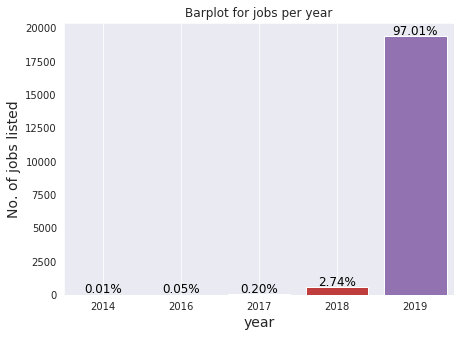

In [0]:
bar_plot(year,x_label='year', y_label='No. of jobs listed', title='Barplot for jobs per year', annot=True)

    as we can clearly see that 97% of the data is from 2019 and 2.74% of the data re of 2018
    for our analysis we can leave out data from 2014, 2016 and 2017 because they must be old job postings which hasn't been deleted 

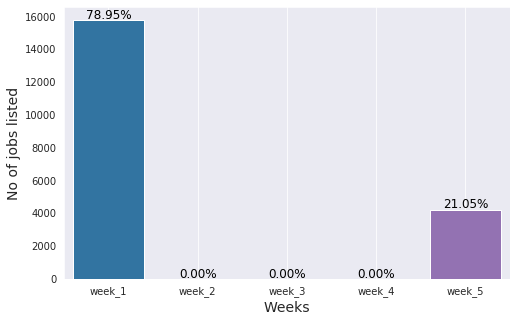

In [0]:
weeks={}
for i in range(1,6):
    weeks['week_'+str(i)]=0
for i in data['post_day'].tolist():
    if 1<=int(i)>=7:
        weeks['week_1'] +=1
    elif 8<=int(i)>=14:
        weeks['week_2'] +=1
    elif 15<=int(i)>=21:
        weeks['week_3'] +=1
    elif 22<=int(i)>=28:
        weeks['week_4'] +=1
    else:
        weeks['week_5']+=1
bar_plot(weeks,x_label='Weeks', y_label='No of jobs listed', annot=True, size=[8,5])

    We can clearly see that all the jobs are posted either in the first week of the month or the last week of the month.
    This tell's us about the trend which is follwed on monster.com

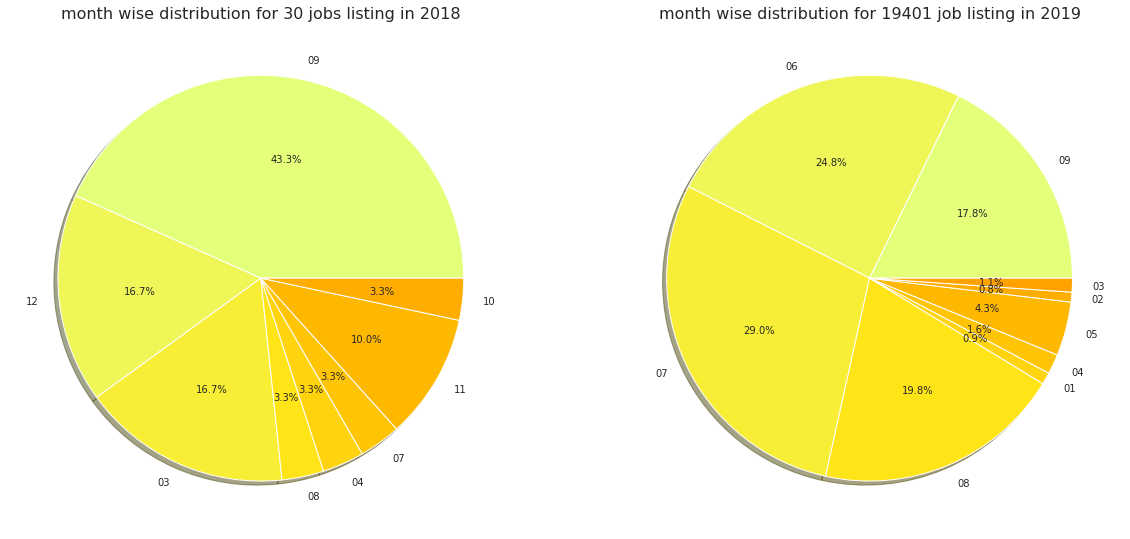

In [0]:
job_2018 = data.loc[(data['post_year']=='2018')& (data['has_expired']=='false')]  # considering only those jobs from 2018 which are confirmed has not expired
job_2019 = data.loc[data['post_year']=='2019']

months_2018 = Counter(job_2018['post_month'])
months_2019 = Counter(job_2019['post_month'])

plt.figure(1, figsize=(20,12))
cmap = plt.get_cmap('Wistia')
colors = [cmap(i) for i in np.linspace(0, 1, 12)]

plt.subplot(1,2,1)
plt.pie(list(months_2018.values()), labels=list(months_2018.keys()), autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('month wise distribution for '+str(len(job_2018))+' jobs listing in 2018', fontsize=16)

plt.subplot(1,2,2)
plt.pie(list(months_2019.values()), labels=list(months_2019.keys()), autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('month wise distribution for '+str(len(job_2019))+' job listing in 2019', fontsize=16)

plt.show()
# referrence: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

    As we can observe there are just 30 job listing which are not yet expired.
    The number of job listings in 2019 are 19401 and highest number of jobs are being listed in july.

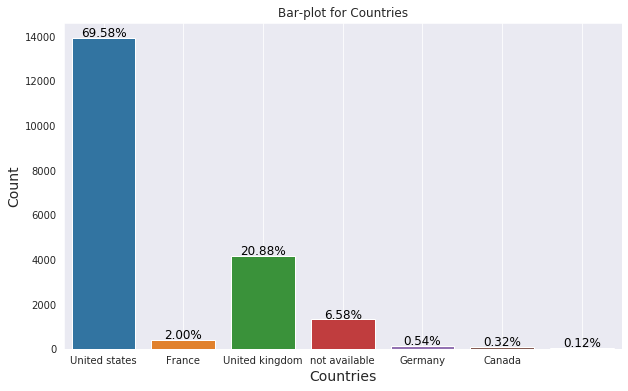

In [0]:
data['inferred_country'] = data['inferred_country'].replace(" ", 'not available')
Countries = Counter(data['inferred_country'])
bar_plot(Countries, size=[10,6],title='Bar-plot for Countries',x_label='Countries', y_label='Count' ,annot=True)

    In above bar plot we can see that 69.75% of the jobs listed are for united states while second highest being united kingdom. 
    We can also observe that for 6.69% jobs the countries are not available

#### Analysis for **jobs** listed in **United** **States**

In [0]:
us_jobs = job_2019.loc[job_2019['inferred_country']== 'United states'].reset_index(drop=True)
us_jobs.drop(us_jobs.loc[us_jobs['state']=='not available'].index, axis=0, inplace=True)

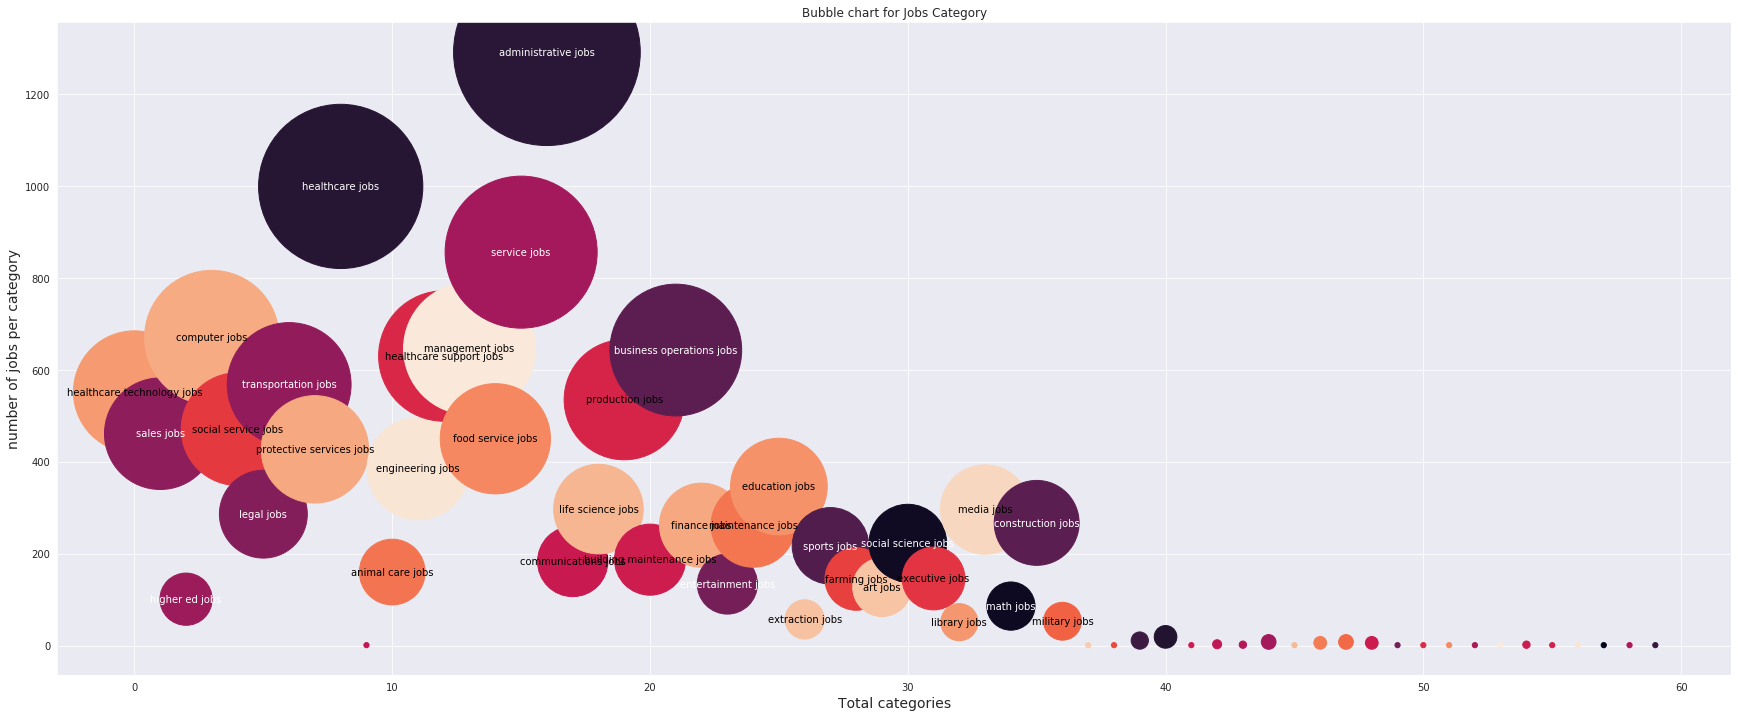

In [0]:
# visualizing job category for us
job_category = Counter(us_jobs['category'])
bubble_chart(job_category,x_label='Total categories', y_label='number of jobs per category', title='Bubble chart for Jobs Category', threshold=40, size=[30,12])

    Looking at the above bubble chart we can see that jobs of category like, Administration, HealthCare, Service jobs, Computer jobs
    etc. are the jobs which were listed more that 600 times. While jobs like Farming, math, military, Library jobs etc are listed 
    for less than 200 times. Therefore we can easily say that jobs whihc are related to Health, Administration, Technology are high 
    in demand

Total number of companies listing there jobs in United States in 2019 =  5549


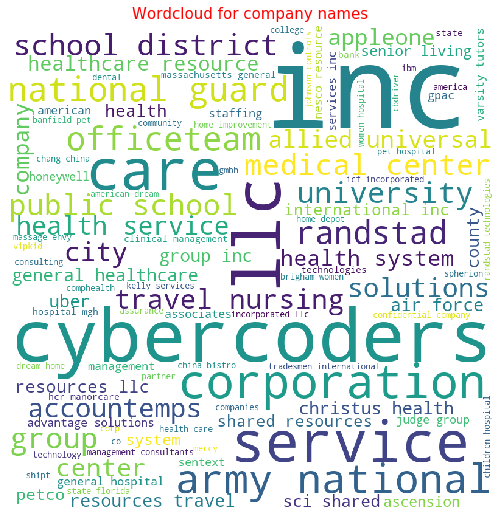

In [0]:
# getting major companies listing there jobs on moster.com from United states
companies = Counter(us_jobs['company_name'])
print("Total number of companies listing there jobs in United States in 2019 = ", len(companies))
word_cloud(list_ = [us_jobs['company_name'].tolist()], title=['company names'])

    These are the companies which are widely posting there jobs on moster.com for united states

In [0]:
# number of companies in each state
states = Counter(us_jobs['inferred_state'])
states_code = Counter(us_jobs['state'])
companies_state = dict.fromkeys(states_code,0)
for i in list(states.keys()):
    temp = us_jobs.loc[us_jobs['inferred_state']==str(i)]
    companies_state[i] = len(Counter(temp['company_name']))

In [0]:
text = ['State name: '+str(i)+'<br>'+'No. of jobs: '+str(j)+'<br>'+"total companies: "+str(companies_state[i])+'<br>'+
        "jobs to company ratio: "+str(round(float(j)/int(companies_state[i]),2)) for i,j in Counter(us_jobs['inferred_state']).items()]
fig = go.Figure(data=go.Choropleth(
    locations= list(states_code.keys()), # Spatial coordinates
    z = list(states.values()), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Number of jobs",
    text = text
))

fig.update_layout(
    title_text = 'State wise jobs listed in United states on monster.com',
    geo_scope='usa', # limite map scope to USA
)
fig.show()
# refference https://plot.ly/python/choropleth-maps/#dash-example

Please run all the cell if the above plot is not visible

    Hover over the above plot to know "number of jobs posted", "number of companies posting there jobs", and "job to company ratio" 
    for each state.

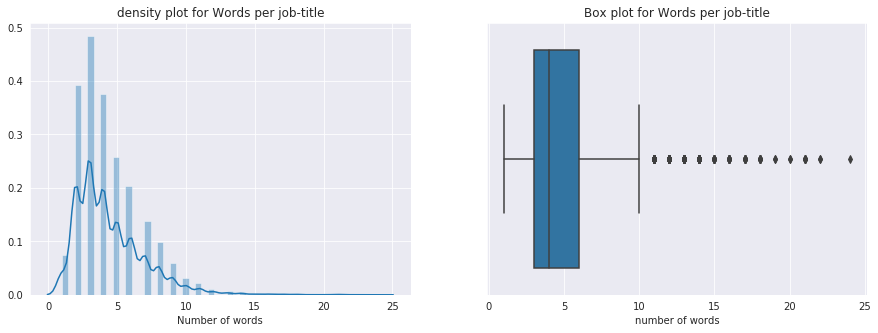

In [0]:
# analysing the number of words used to describe job title by the companies to post there jobs
us_jobs['words_per_title'] = [len(i.split()) for i in us_jobs['job_title'].tolist()]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(us_jobs['words_per_title'].tolist())
plt.title("density plot for Words per job-title")
plt.xlabel("Number of words")
plt.subplot(1,2,2)
sns.boxplot(us_jobs['words_per_title'].tolist())
plt.xlabel("number of words")
plt.title("Box plot for Words per job-title")
plt.show()

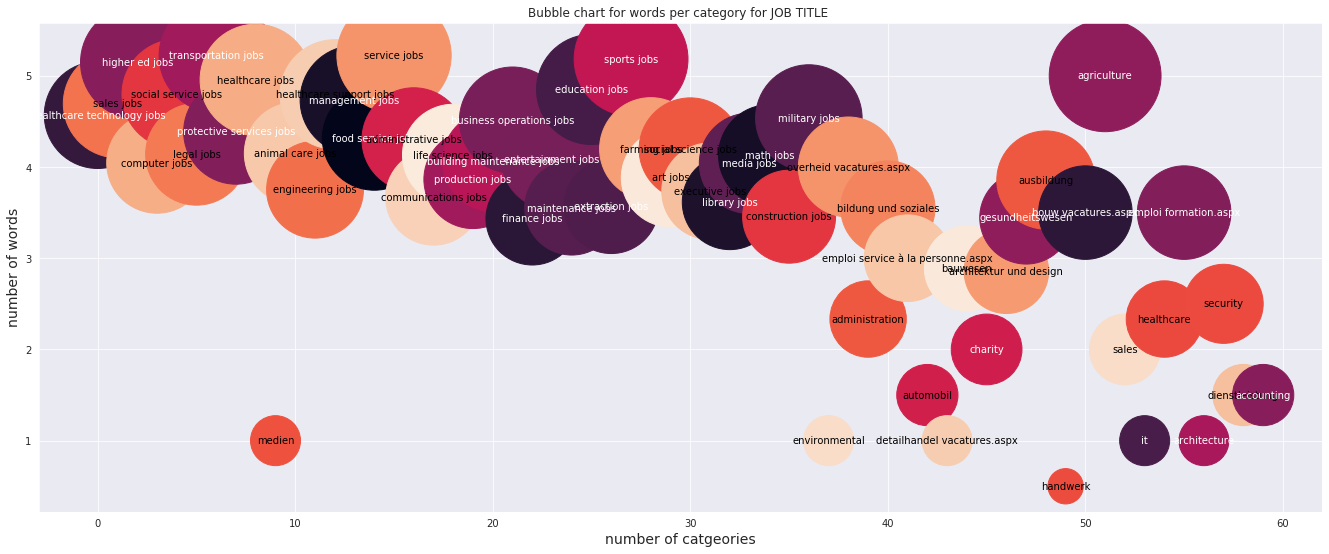

In [0]:
# bubble chart for avg number of words for each category
words_per_category = dict.fromkeys(job_category,0)
for i in list(words_per_category.keys()):
    temp = us_jobs.loc[us_jobs['category']==i]
    words_per_category[i] = sum(temp['words_per_title'].tolist())/(len(temp)+1)
bubble_chart(words_per_category, threshold=0,y_label='number of words', x_label='number of catgeories', 
             title='Bubble chart for words per category for JOB TITLE ', area=2500, size=[23,9])

    Looking at the above plots we can say that, average number of words used to give job title are 3-5.

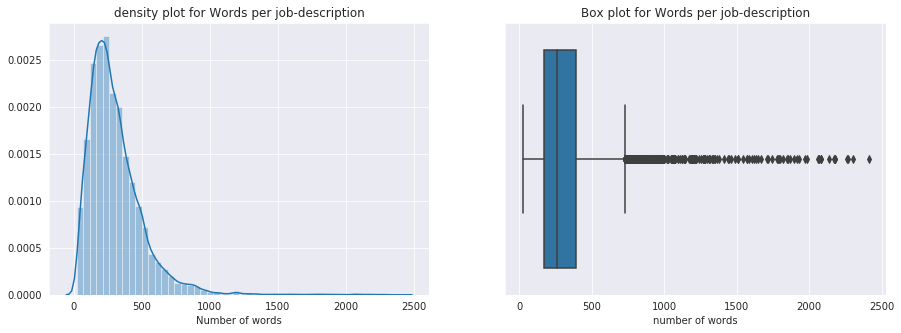

In [0]:
us_jobs['words_per_description'] = [len(i.split()) for i in us_jobs['job_description'].tolist()]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(us_jobs['words_per_description'].tolist())
plt.title("density plot for Words per job-description")
plt.xlabel("Number of words")
plt.subplot(1,2,2)
sns.boxplot(us_jobs['words_per_description'].tolist())
plt.xlabel("number of words")
plt.title("Box plot for Words per job-description")
plt.show()

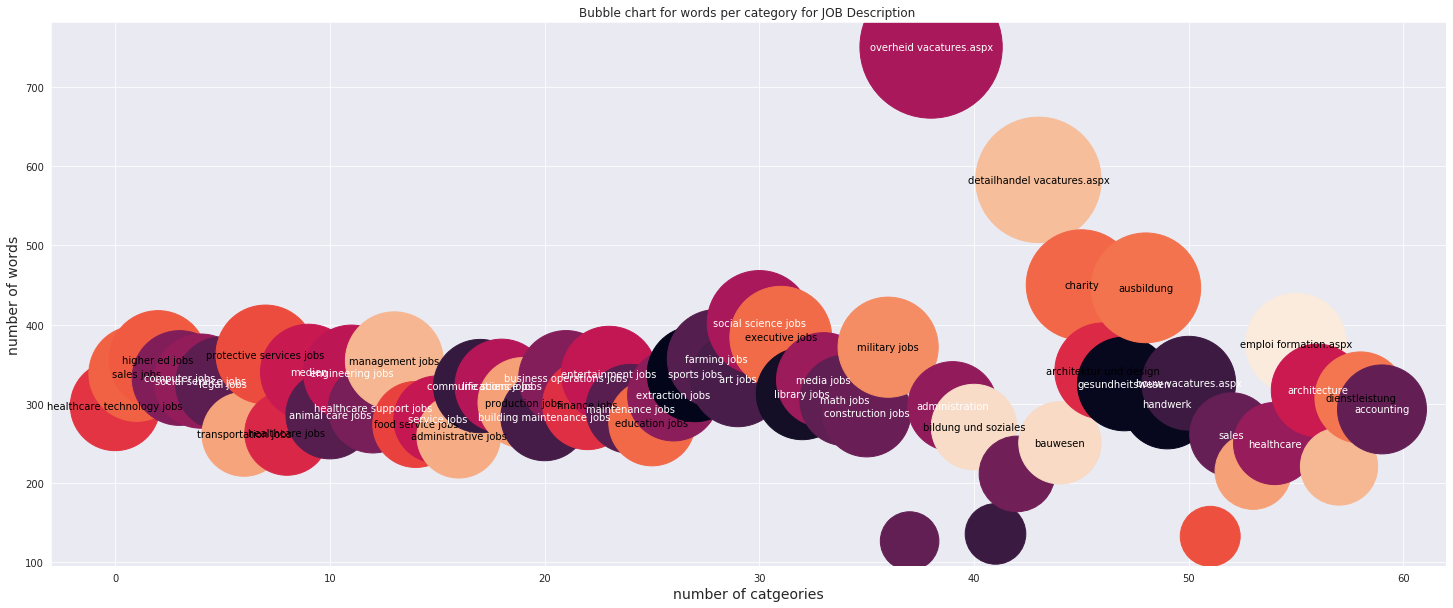

In [0]:
# bubble chart for avg number of words for each category
words_per_category = dict.fromkeys(job_category,0)
for i in list(words_per_category.keys()):
    temp = us_jobs.loc[us_jobs['category']==i]
    words_per_category[i] = sum(temp['words_per_description'].tolist())/len(temp)
bubble_chart(words_per_category, y_label='number of words', x_label='number of catgeories', 
             title='Bubble chart for words per category for JOB Description ',threshold=250, area=27)

    In the above plots the average number of words used for job description are about 350. few job categories like detail 
    handel vacatures, charity, ausbuilding have avg job description of more than 400 words

#### For which job categories companies giving there description

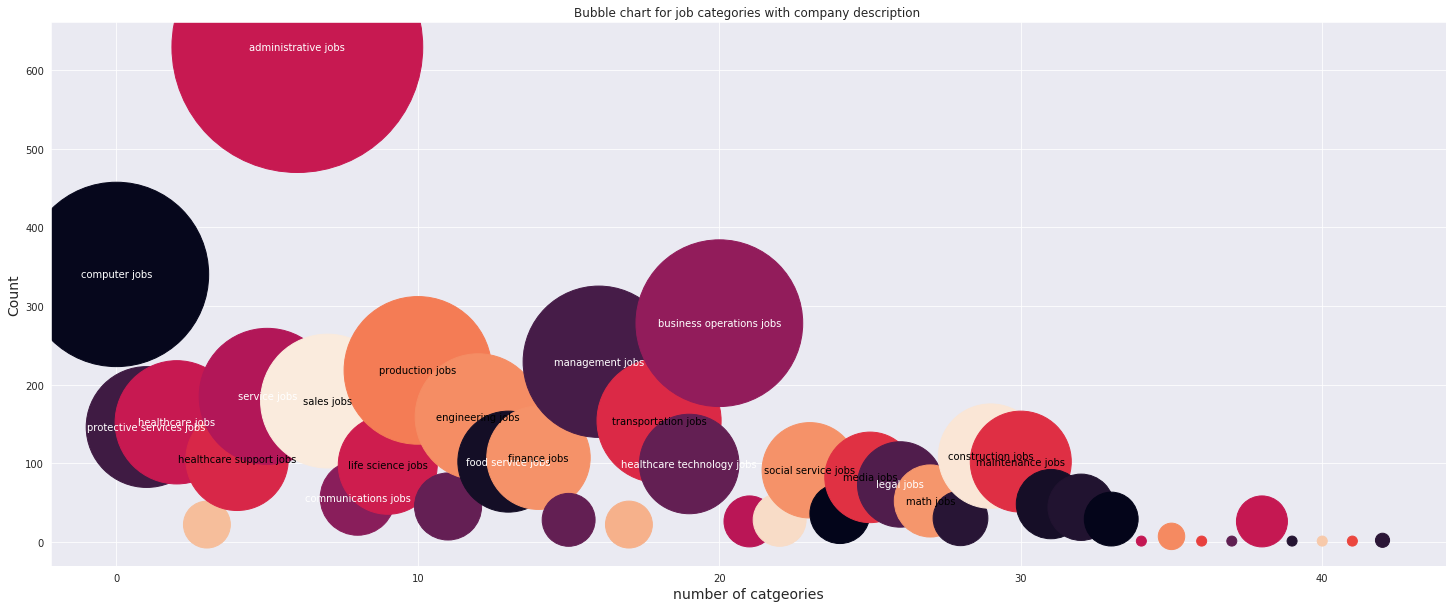

In [0]:
temp = us_jobs.loc[us_jobs['company_description']!='not_avail']
job_category = Counter(temp['category'])
bubble_chart(job_category, y_label='Count', x_label='number of catgeories', 
             title='Bubble chart for job categories with company description ',threshold=50, area=100)

    For the jobs like administration, computer business operations, production etc. companies tends to give there compay description.

#### For which job categories companies not giving there description

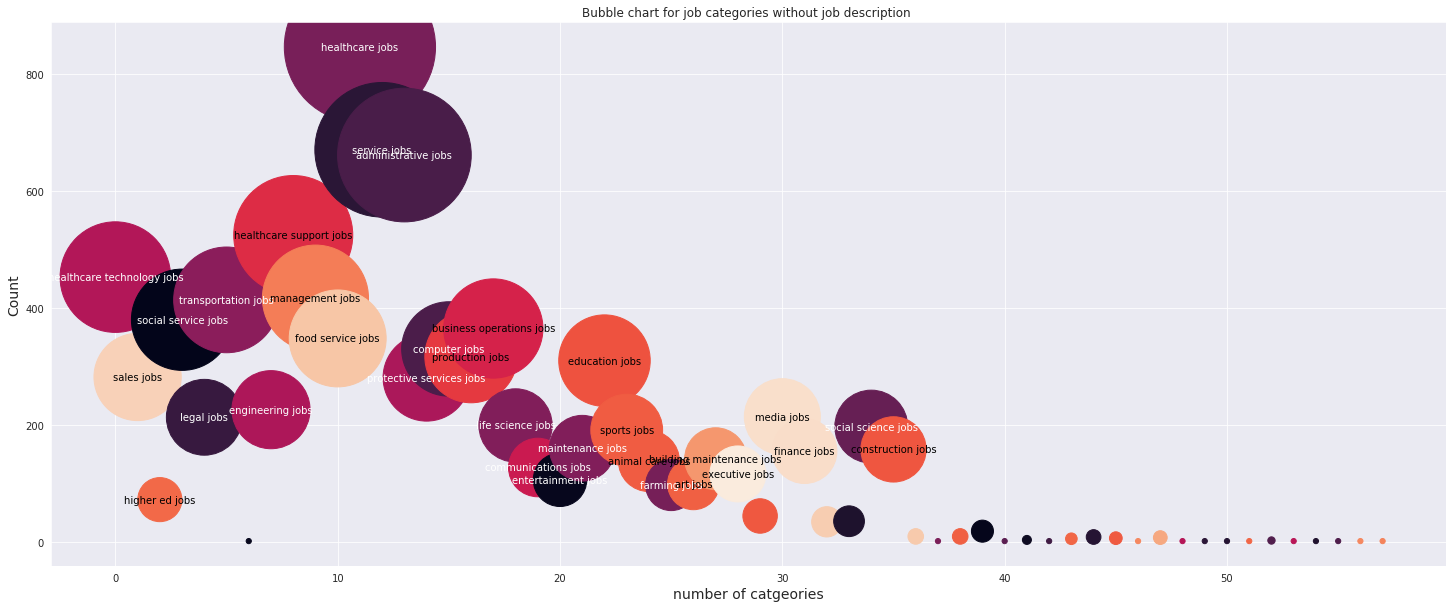

In [0]:
temp = us_jobs.loc[us_jobs['company_description']=='not_avail']
job_category = Counter(temp['category'])
bubble_chart(job_category, y_label='Count', x_label='number of catgeories', 
             title='Bubble chart for job categories without job description ',threshold=50, area=27)

    For jobs like service, healthcare, administrative, transportation, food service, sales etc, companies do not give there 
    company description

#### Which many companies provide contact person details?

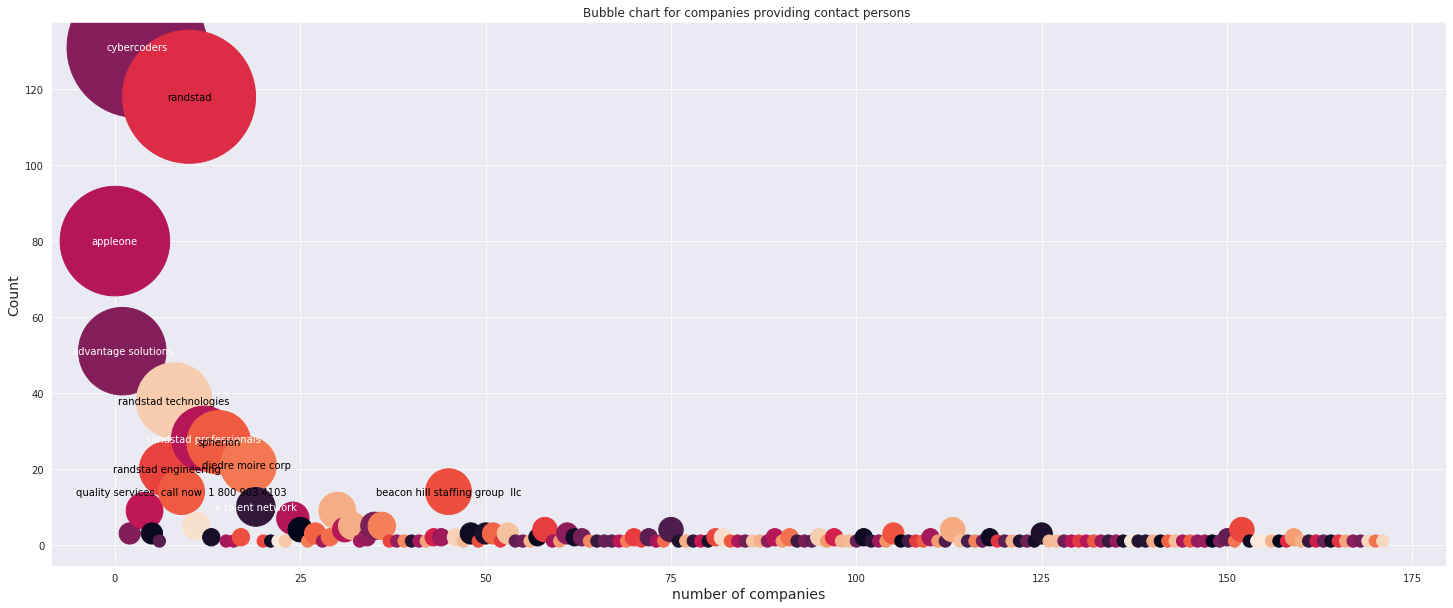

In [0]:
temp = us_jobs.loc[us_jobs['contact_person']!='not available']
contact_person = Counter(temp['company_name'])
bubble_chart(contact_person, y_label='Count', x_label='number of companies', 
             title='Bubble chart for companies providing contact persons ',threshold=10, area=150)

    Not many companies are interested in providing the contact person for the job posted on monster.com. But companies like randstad, 
    cybercoders,appleone, advatage solutions, e talnet etc. networks have provided the contact person for the jobs posted 
    on monster.com.

#### So general scenario for jobs on **monster**.**com** for **United** **States** are: 

*   The jobs posted on monster.com are divide in 60 categories ranging from health care to administration etc.
*   There are total 5586 companies who has posted there jobs on monster.com
*   For each state of united states the job to company ratio is around 2. Means there are many companies who have posted more than 2 jobs on monster.com from each state.
*   On an average the number of words used to describe the job title is 3-5.
*   The average number of words used to describe job description are from 300-350, there are some companies which uses more than 400 words to describe jobs.
*   Not many comapies are interested in giving there company description. But for jobs like Administration, Computer, Business, Production etc. the comapnies
like to give there description. While companies majorly from health sector do not give there company description.
*   Leaving out few companies like cybercoders, randstad the companies  etc. not many company are interested in proving contact person.
*   We saw earlier that details like email, contact number, salary offered. companies tends to ommit these details.


#### Analysis for **jobs** listed in **United Kingdom,** **France** and  **Germany**

In [0]:
# Getting job data for ountries excluding canada and united states 
jobs = job_2019.loc[(job_2019['inferred_country'] != 'United states') &(job_2019['inferred_country'] != 'Canada')&(job_2019['inferred_country'] != 'unknown')].reset_index(drop=True)

In [0]:
jobs.head()

,uniq_id,url,job_title,category,company_name,city,state,country,job_description,job_board,geo,job_post_lang,site_name,domain,has_expired,inferred_city,inferred_state,inferred_country,fitness_score,job_type,company_description,contact_person,contact_phone_number,job_requirements,post_year,post_month,post_day
0,10ffec2ba375ce1f7836d982e53cefc9,https://offre-demploi.monster.fr/stage-alterna...,stage altern jurist,emploi juridique.aspx,astrazeneca,not available,not available,France,stage ou altern jurist pourvoir dè aout 2019 p...,monster,not available,not available,not available,not available,not available,not available,not available,France,7.0,not available,not_avail,not available,not available,not available,2019,06,20
1,f3c605b9d93db3bb2932d2858b85ac4b,https://job-openings.monster.co.uk/class-1-hgv...,class hgv driver,construction,orange recruitment,Hampton in Arden,MID,UK,class hgv driver hampton arden solihul b92 0lp...,monster,not available,not available,not available,not available,not available,Hampton,Richmond upon thames,United kingdom,10.0,FULL_TIME,orang recruit deal 100 vacanc varieti employ a...,Orange Recruitment,01675 443888,not available,2019,06,25
2,cf53352ae14704f9db06f7888d7af08a,https://stellenangebot.monster.de/applications...,applic engin,umwelt,msc technologies gmbh,Neufahrn,Bayern,Deutschland,msc technolog ein unternehmen der avnet inc ny...,monster,not available,not available,not available,not available,not available,not available,not available,not available,9.0,FULL_TIME,not_avail,not available,not available,not available,2019,06,07
3,abf844e33add926afd87b7a9d374b987,https://offre-demploi.monster.fr/technicien-de...,technicien de laboratoir vrd,emploi r et d et science.aspx,agilis,Mernel,BRE,France,technicien de laboratoir vrd publié le avril 2...,monster,not available,not available,not available,not available,not available,not available,not available,France,9.0,not available,not_avail,not available,not available,not available,2019,06,22
4,101182548ad84af6b47f966ca1bac8b9,https://job-openings.monster.co.uk/branch-mana...,branch manag,customer service,national australia bank,Aust,not available,UK,lead katoomba branch next level success showca...,monster,not available,not available,not available,not available,not available,not available,not available,United kingdom,8.0,not available,not_avail,not available,not available,not available,2019,06,28


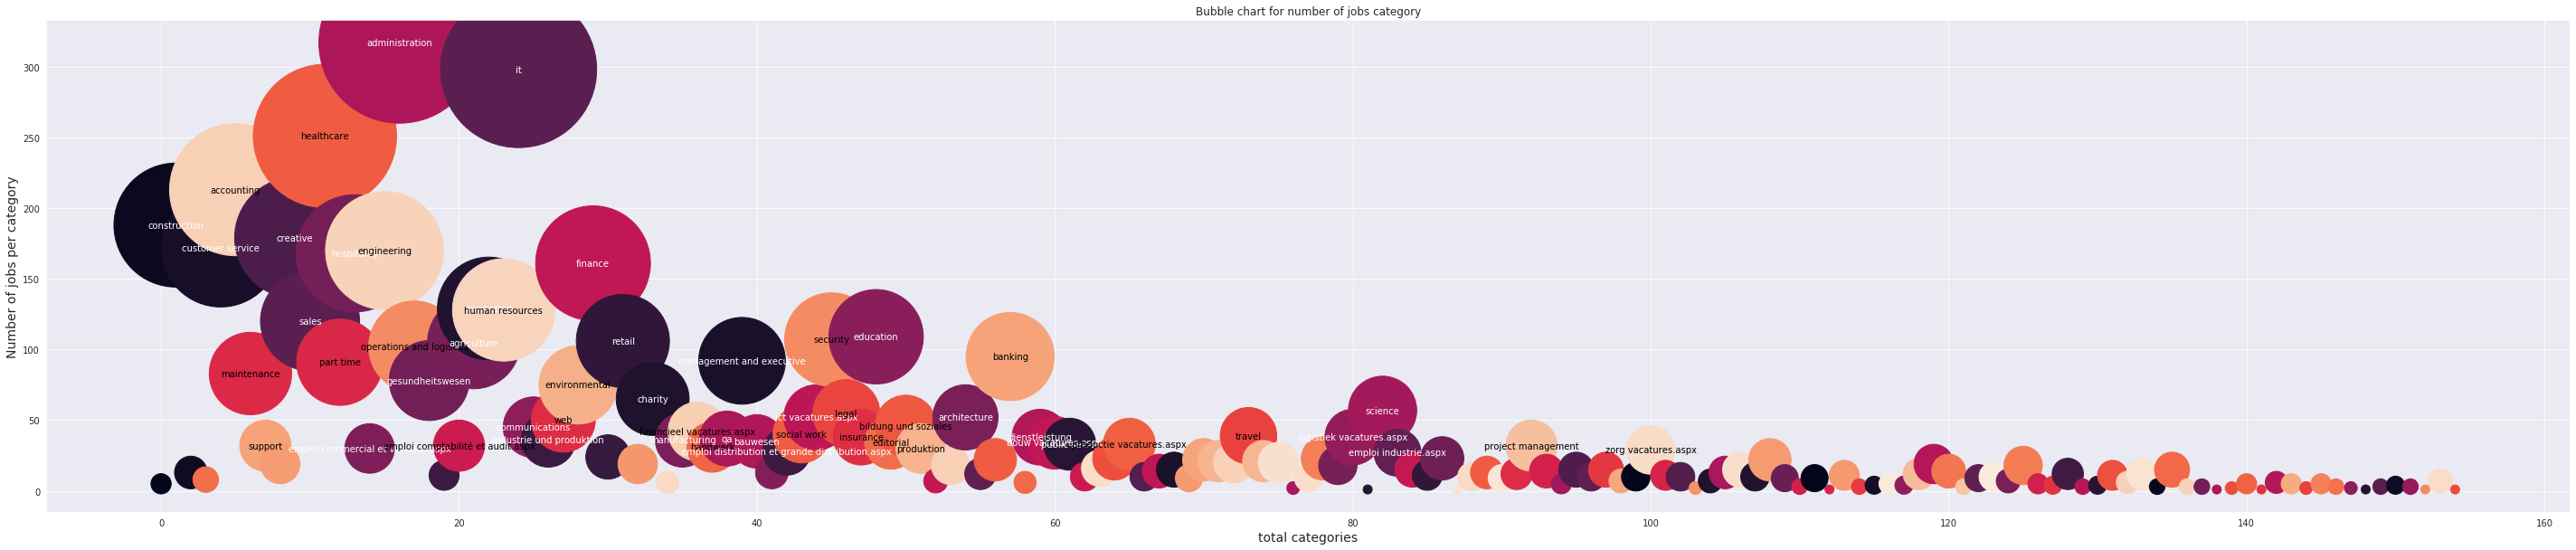

In [0]:
# visualizing job category for uk, france, germany
job_category = Counter(jobs['category'])
bubble_chart(job_category,x_label='total categories', y_label='Number of jobs per category',title='Bubble chart for number of jobs category', threshold=25, size=[50,10],area=100)

    We can observe that jobs like administration, IT, accounting, health care, customer service etc. are posted on the monster.com.

Total number of companies listing there jobs in UK, France, Germany in 2019 =  2207


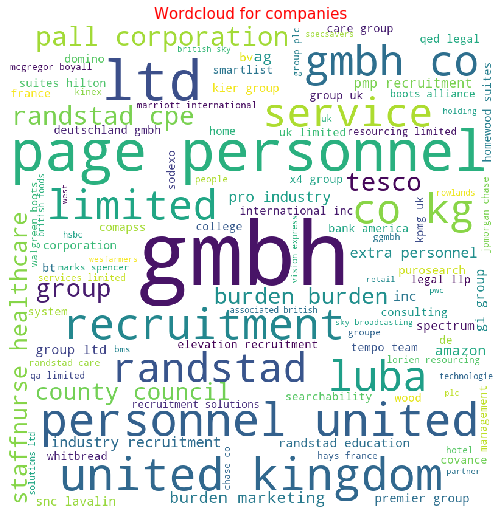

In [0]:
# getting major companies listing there jobs on moster.com
companies = Counter(jobs['company_name'])
print("Total number of companies listing there jobs in UK, France, Germany in 2019 = ", len(companies))
word_cloud(list_ = [jobs['company_name'].tolist()], title=['companies'])

In [0]:
# number of companies in each state
country = Counter(jobs['inferred_country'])
country_code = {'France':'FRA', 'United kingdom':'GBR','Germany': 'DEU'}
companies_country = dict.fromkeys(country,0)
for i in list(country.keys()):
    temp = jobs.loc[jobs['inferred_country']==str(i)]
    companies_country[i] = len(Counter(temp['company_name']))

In [0]:
text = ['State name: '+str(i)+'<br>'+'No. of jobs: '+str(j)+'<br>'+"total companies: "+str(country[i])+'<br>'+
        "jobs to company ratio: "+str(round(float(j)/int(companies_country[i]),2)) for i,j in Counter(jobs['inferred_country']).items()]
fig = go.Figure(data=go.Choropleth(
    locations= list(country_code.values()), # Spatial coordinates
    z = list(country.values()), # Data to be color-coded
    locationmode = 'ISO-3', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "number of jobs",
    text = text
))

fig.update_layout(
    title_text = 'Country wise job listed in Europian on monster.com',
    geo_scope='europe', # limite map scope to USA
)
fig.show()
# refference https://plot.ly/python/choropleth-maps/#dash-example

Please run all the cell if the above plot is not visible

    Hover over the above plot to know "number of jobs posted", "number of companies posting there jobs", and "job to company ratio" 
    for countries UK, France, and Germany

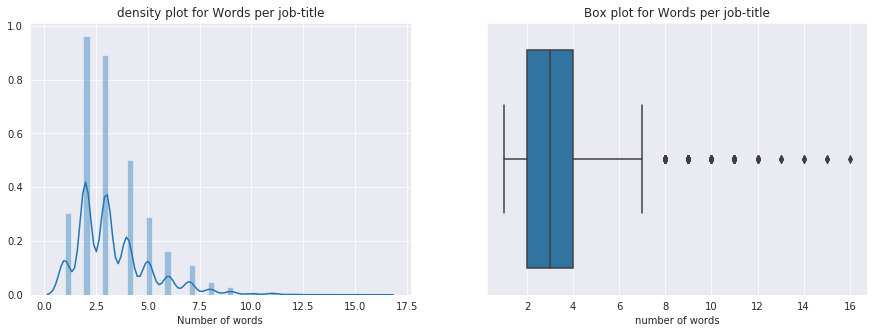

In [0]:
jobs['words_per_title'] = [len(i.split()) for i in jobs['job_title'].tolist()]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(jobs['words_per_title'].tolist())
plt.title("density plot for Words per job-title")
plt.xlabel("Number of words")
plt.subplot(1,2,2)
sns.boxplot(jobs['words_per_title'].tolist())
plt.xlabel("number of words")
plt.title("Box plot for Words per job-title")
plt.show()

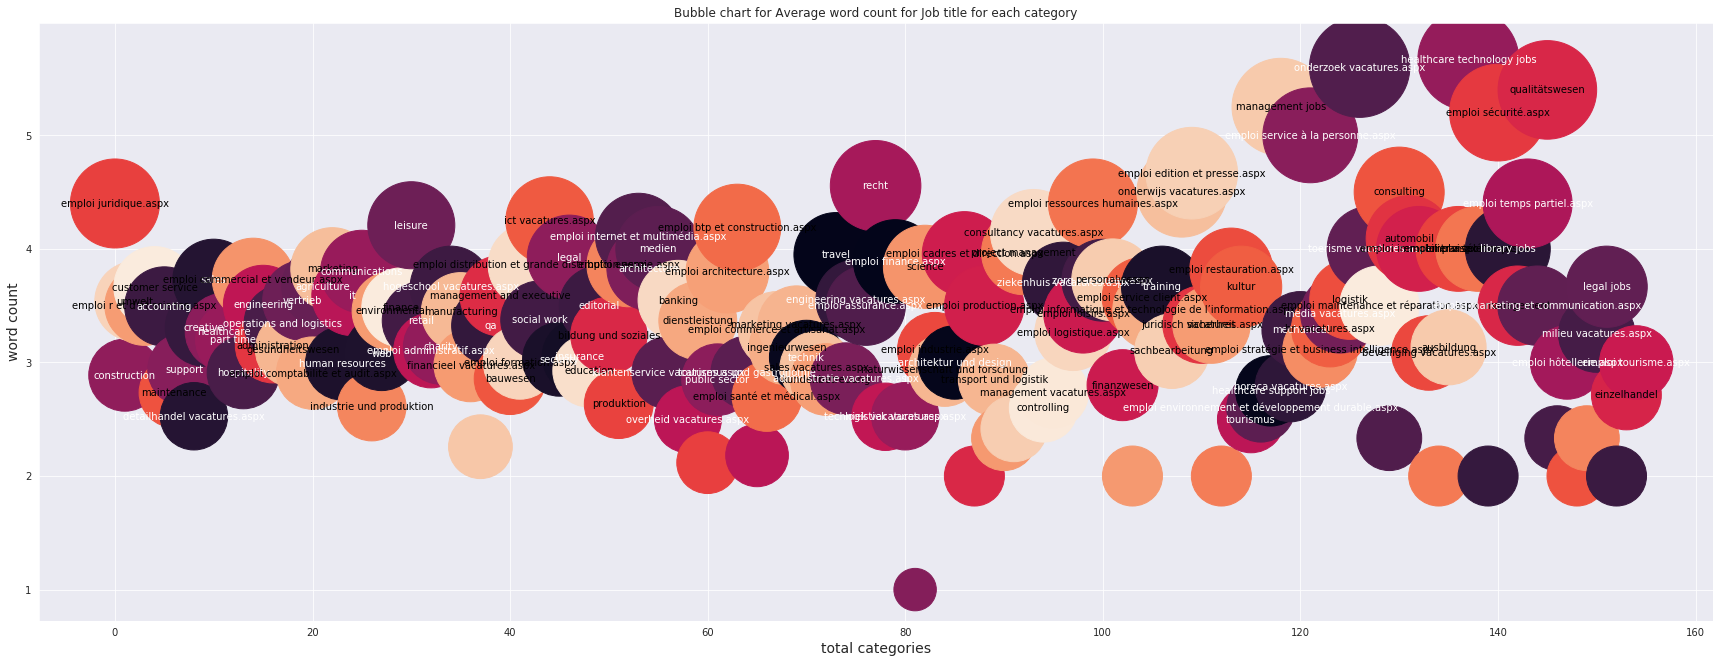

In [0]:
# bubble chart for avg number of words for each category
words_per_category = dict.fromkeys(job_category,0)
for i in list(words_per_category.keys()):
    temp = jobs.loc[jobs['category']==i]
    words_per_category[i] = sum(temp['words_per_title'].tolist())/len(temp)
bubble_chart(words_per_category,x_label='total categories', y_label='word count', 
             title='Bubble chart for Average word count for Job title for each category', threshold=2.5, area=1800, size=[30,11])

    Looking at the above plots the average number of words used for title are 3-4 words.

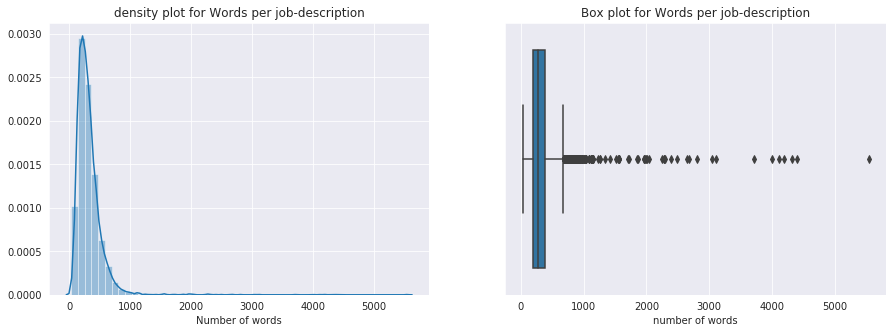

In [0]:
jobs['words_per_description'] = [len(i.split()) for i in jobs['job_description'].tolist()]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(jobs['words_per_description'].tolist())
plt.title("density plot for Words per job-description")
plt.xlabel("Number of words")
plt.subplot(1,2,2)
sns.boxplot(jobs['words_per_description'].tolist())
plt.xlabel("number of words")
plt.title("Box plot for Words per job-description")
plt.show()

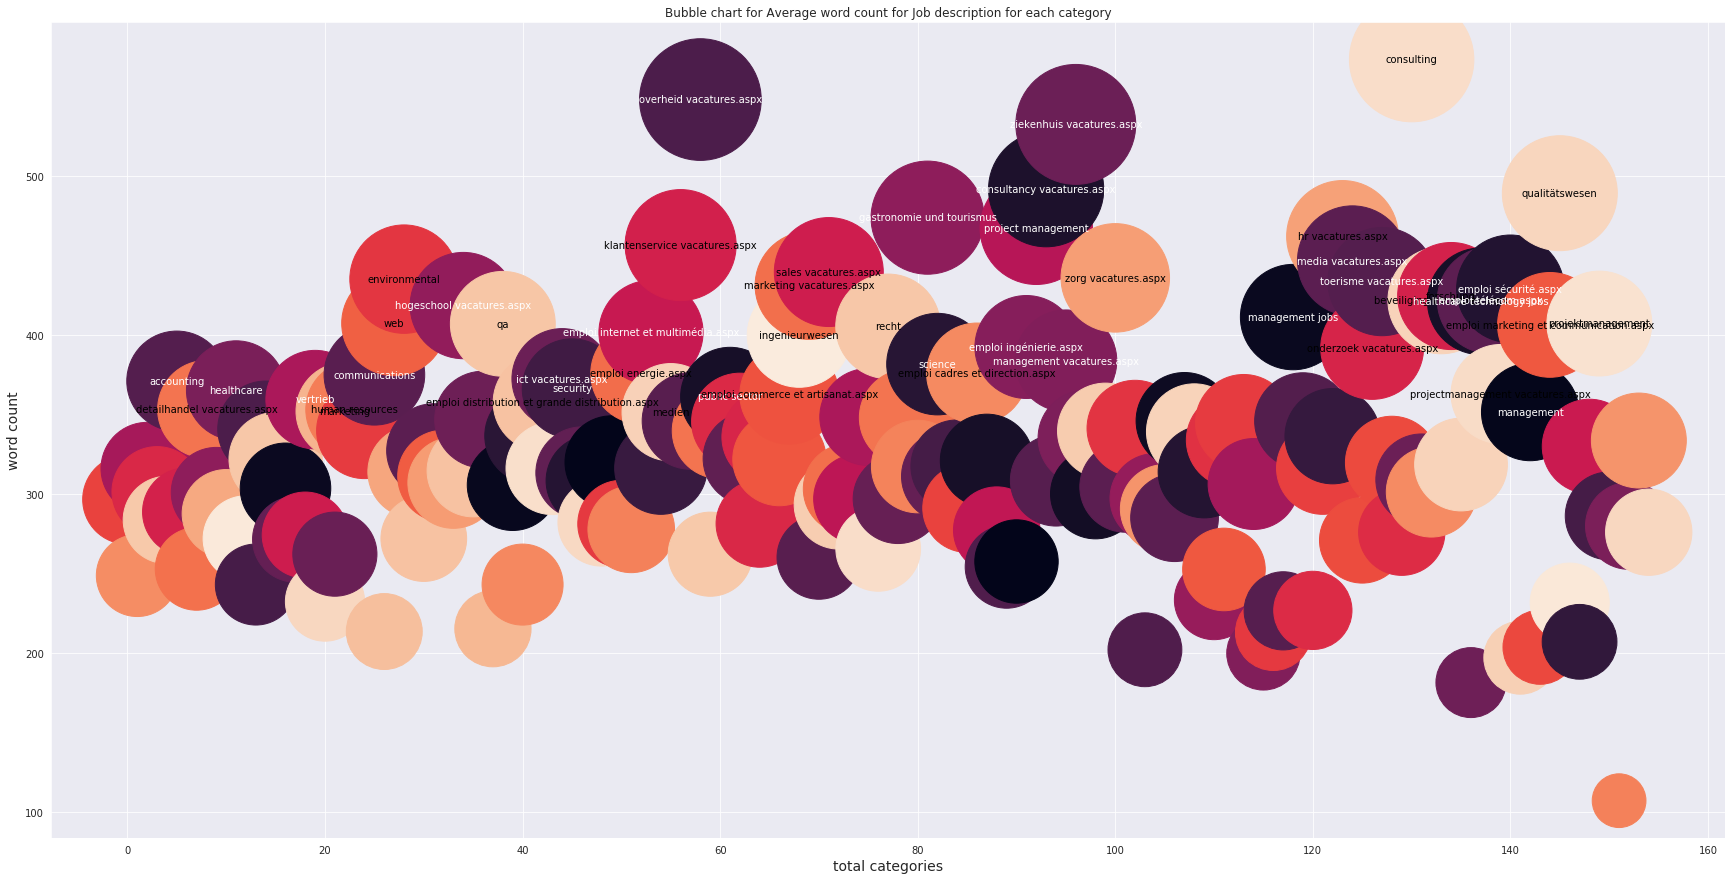

In [0]:
# bubble chart for avg number of words for each category
words_per_category = dict.fromkeys(job_category,0)
for i in list(words_per_category.keys()):
    temp = jobs.loc[jobs['category']==i]
    try:
        words_per_category[i] = sum(temp['words_per_description'].tolist())/len(temp)
    except:
        words_per_category[i]= sum(temp['words_per_description'].tolist())
bubble_chart(words_per_category,x_label='total categories', y_label='word count', 
             title='Bubble chart for Average word count for Job description for each category',threshold=350, area=27, size=[30,15])

    Looking at the above plots the average number of words used to describe job are arounf 300-400 while there are many companies from 
    job categories like consultancy, tourisum, various vantures which give job description in more than 400 words.

#### for which job categories companies giving there description

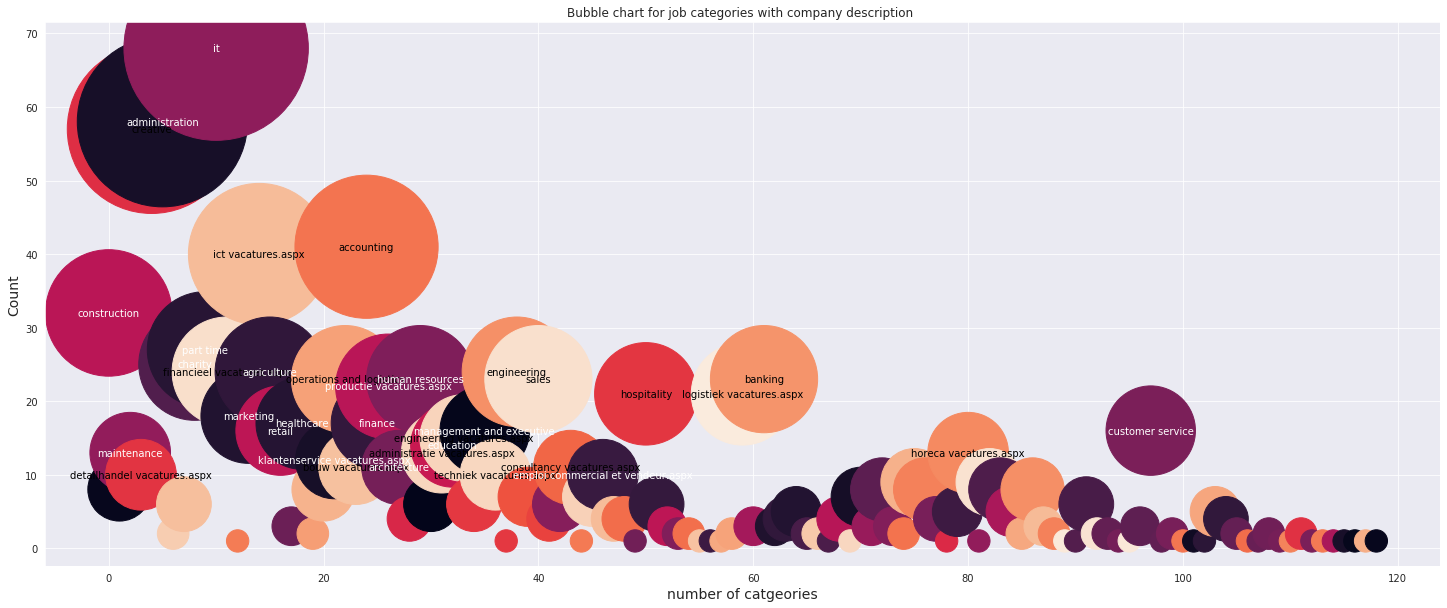

In [0]:
temp = jobs.loc[jobs['company_description']!='not_avail']
job_category = Counter(temp['category'])
bubble_chart(job_category, y_label='Count', x_label='number of catgeories', 
             title='Bubble chart for job categories with company description ',threshold=10, area=500)

    Companies posting jobs related to IT, administration, creative, accounting etc. are the company giving there company description.

#### for which job categories companies not giving there description

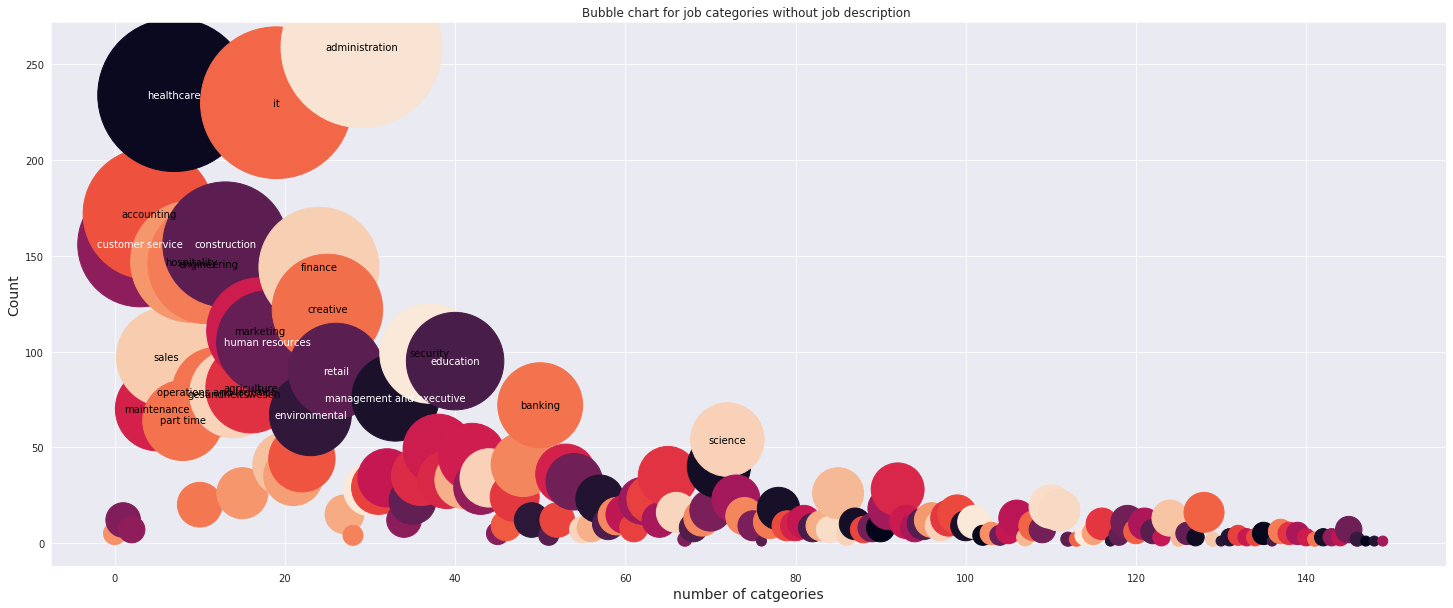

In [0]:
temp = jobs.loc[jobs['company_description']=='not_avail']
job_category = Counter(temp['category'])
bubble_chart(job_category, y_label='Count', x_label='number of catgeories', 
             title='Bubble chart for job categories without job description ',threshold=50, area=100)

    here also some IT, administration, health care etc. gerally skip company description. 

#### Which many companies provide contact person details?

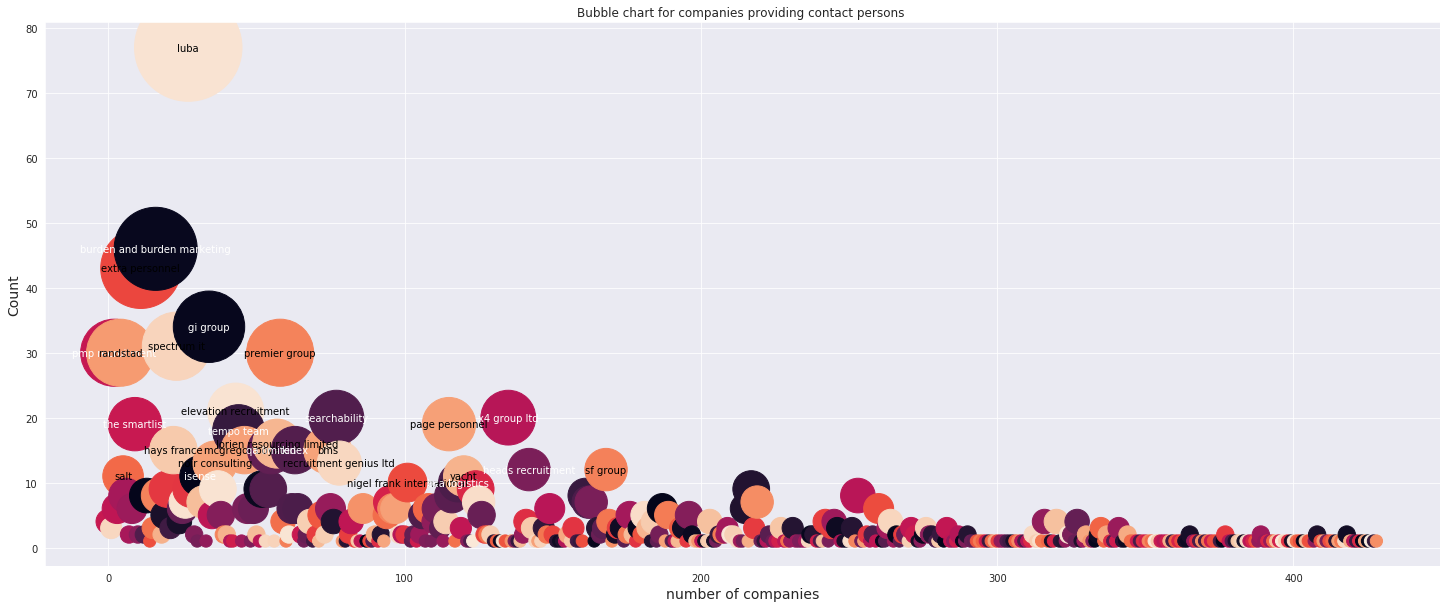

In [0]:
temp = jobs.loc[jobs['contact_person']!='not available']
contact_person = Counter(temp['company_name'])
bubble_chart(contact_person, y_label='Count', x_label='number of companies', 
             title='Bubble chart for companies providing contact persons ',threshold=10, area=150)

    There are very few companies which provide contact persons for the jobs they posted. Companies like luba, gi group etc. 
    provide contact person detail foor there jobs. 

In [0]:
len(Counter(jobs['company_name']))

2207

#### So general scenario for jobs on **monster**.**com** for **Europian** **countries** are: 

*   The jobs posted on monster.com are divide in 120 categories for Europian countries. This may be because of the different language.
*   There are total 2207 companies who has posted there jobs on monster.com
*   For Uk the job to company ratio is 3.22 which means there are many companies which are offering jobs for more than 3 atleast. For france and germany it is similar to that was for united states, 1-2.
*   On an average the number of words used to describe the job title is 3-4.
*   The average number of words used to describe job description are from 300-400, there are some companies which uses more than 500 words to describe jobs.
*   Not many comapies are interested in giving there company description. But for jobs like Administration, Computer, Business, Production etc. the comapnies
like to give there description. While companies majorly from health sector do not give there company description.
*   Leaving out few companies like luba, gi group etc. not many company are interested in proving contact person.
*   We saw earlier that details like email, contact number, salary offered. companies tends to ommit these details.


# **Conclusions**

    Here both is USA and Europian Countries we can see the common scenario that the company avoid giving there company details, email, 
    contact person while posting a job on monster.com. Also almost no company is telling the salary offered by them while posting 
    jobs. Overall the job to company ratio for united states was more than 2 and for UK it was more than 3. which means compaies 
    like to post more than 2 jobs at a time on moster.com. Also we observe the common trends that the companies post jobs only in 
    the first and the last week of the month, that also in the first week of the month.